In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv("/Users/mengzhao/Desktop/Useful_info/1_springboard_ds_track/"+
                   "1_capstone_project1/data_complete_w_features.csv",index_col = 0)
data = data.dropna()
data.head()

,formula,structure,spacegroup,formation_energy_ev_natom,bandgap_energy_ev,structure_obj,composition,minimum Number,maximum Number,range Number,...,avg_dev SpaceGroupNumber,mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,Al5(GaO4)3,Full Formula (Al20 Ga12 O48)\nReduced Formula:...,33,0.0680,3.4387,Full Formula (Al20 Ga12 O48)\nReduced Formula:...,Al5 Ga3 O12,8.0,31.0,23.0,...,75.97500,12.0,Al3+5 Ga3+3 O2-12,-2,3,5,3.287980,4.558828,9.763082,0.406490
1,Al5(GaO4)3,Full Formula (Al20 Ga12 O48)\nReduced Formula:...,194,0.2490,2.9210,Full Formula (Al20 Ga12 O48)\nReduced Formula:...,Al5 Ga3 O12,8.0,31.0,23.0,...,75.97500,12.0,Al3+5 Ga3+3 O2-12,-2,3,5,3.287980,4.550388,9.781192,0.405737
2,Al13(GaO8)3,Full Formula (Al13 Ga3 O24)\nReduced Formula: ...,227,0.1821,2.7438,Full Formula (Al13 Ga3 O24)\nReduced Formula: ...,Al13 Ga3 O24,8.0,31.0,23.0,...,90.91875,12.0,Al3+13 Ga3+3 O2-24,-2,3,5,3.368608,4.006360,9.780743,0.397922
3,Al3InO6,Full Formula (Al9 In3 O18)\nReduced Formula: A...,167,0.2172,3.3492,Full Formula (Al9 In3 O18)\nReduced Formula: A...,Al3 In1 O6,8.0,49.0,41.0,...,91.92000,12.0,Al3+3 In3+1 O2-6,-2,3,5,3.333333,4.954174,9.779173,0.465999
4,In3Ga5O12,Full Formula (In12 Ga20 O48)\nReduced Formula:...,194,0.0505,1.3793,Full Formula (In12 Ga20 O48)\nReduced Formula:...,In3 Ga5 O12,8.0,49.0,41.0,...,38.46000,12.0,In3+3 Ga3+5 O2-12,-2,3,5,3.287980,6.222728,11.808966,0.438933


In [7]:
# split the data, the target1 is formation energy, the target2 is bandgaps
features = data.drop(['formula','structure_obj', 
                      'composition',
                      'structure',
                      'composition_oxid',
                      'formation_energy_ev_natom',
                      'bandgap_energy_ev'], axis = 1)

features = features.astype(float)

target1 = data['formation_energy_ev_natom']
target2 = data['bandgap_energy_ev']

random_state = 42

# split data for target1 formation energy
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, 
                                                        target1, 
                                                        test_size=0.3, 
                                                        random_state=random_state)

# split data for target2 bandgap
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, 
                                                        target2, 
                                                        test_size=0.3, 
                                                        random_state=random_state)
X_train1.head()

,spacegroup,minimum Number,maximum Number,range Number,mean Number,avg_dev Number,mode Number,minimum MendeleevNumber,maximum MendeleevNumber,range MendeleevNumber,...,mean SpaceGroupNumber,avg_dev SpaceGroupNumber,mode SpaceGroupNumber,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
616,63.0,8.0,56.0,48.0,25.000000,17.000000,8.0,9.0,87.0,78.0,...,119.500000,107.500000,12.0,-2.0,2.0,4.0,2.529822,6.103243,15.509574,0.866325
278,71.0,8.0,35.0,27.0,25.250000,9.750000,35.0,46.0,95.0,49.0,...,92.250000,68.375000,64.0,-2.0,4.0,6.0,2.966479,4.334407,21.717236,0.275726
914,62.0,8.0,26.0,18.0,14.000000,8.000000,8.0,55.0,87.0,32.0,...,84.333333,96.444444,12.0,0.0,0.0,0.0,0.000000,4.236996,11.475745,0.386427
2628,14.0,16.0,16.0,0.0,16.000000,0.000000,16.0,88.0,88.0,0.0,...,70.000000,0.000000,70.0,0.0,0.0,0.0,0.000000,1.908408,27.900309,0.150134
3331,14.0,8.0,76.0,68.0,19.666667,18.777778,8.0,57.0,93.0,36.0,...,43.333333,50.222222,12.0,-2.0,8.0,10.0,4.612237,6.434500,11.880809,0.181866


## predicting formation energies

In [11]:
# Utility function to report best scores

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# setting intial pipeline paramters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

k_fold = 5
n_iter_search = 50


scaler= StandardScaler()
rf = RandomForestRegressor()

randomsearch_rf = RandomizedSearchCV(estimator = rf,
                                      param_distributions = random_grid, 
                                      n_iter = n_iter_search,
                                      verbose=2, 
                                      random_state=42,
                                      cv = k_fold,
                                      n_jobs= -1)

pipe_rf = make_pipeline(scaler,randomsearch_rf)

# List of pipelines for ease of iteration
pipelines = [pipe_rf] 

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Random Forest regression'} 

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train1, y_train1) 
    y_test_pred = pipe.predict(X_test1)
    score = pipe.score(X_test1, y_test1) 
    print("the score for test data: {}".format(score))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 58.6min finished


the score for test data: 0.981349588316378


In [13]:
from sklearn.externals import joblib
filename = 'finalized_randomforest.sav'
joblib.dump(randomsearch_rf.best_estimator_, open(filename, 'wb'))
print('model file is saved as {}'.format(filename))
print ("done")

model file is saved as finalized_randomforest.sav
done


In [16]:
from sklearn.metrics import mean_absolute_error

y_pred_test1 = pipelines[0].predict(X_test1)

mean_absolute_error = mean_absolute_error(y_test1, y_pred_test1)
print("MAE(mean absolute error) is {} eV/atom".format(round(mean_absolute_error,2)))

MAE(mean absolute error) is 0.07 eV/atom


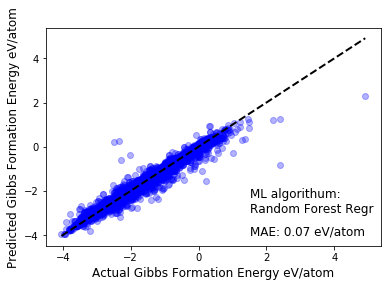

In [26]:
# plot the figure
fontsize = 12
plt.scatter(y_test1, y_pred_test1, marker='o', color = 'blue', alpha = 0.3)
straightline_x = [min(y_test1), max(y_test1)]
straightline_y = [min(y_test1), max(y_test1)]
plt.plot(straightline_x, straightline_y, 'k--', linewidth=2)
plt.xlabel("Actual Gibbs Formation Energy eV/atom", fontsize = fontsize)
plt.ylabel("Predicted Gibbs Formation Energy eV/atom", fontsize = fontsize)
label1 = "MAE: {} eV/atom".format(round(mean_absolute_error,2))
label2 = "ML algorithum:\n{}".format('Random Forest Regr')
plt.text(1.5, -4, label1, fontsize=fontsize)
plt.text(1.5, -3, label2, fontsize=fontsize)
plt.savefig("./actual vs. predicted Gibbs formation energy_random_searchCV_randomforest.jpeg",dpi = 400)

In [33]:
# number of testset
observations = 9441

pred_list = []
actual_list = []

pred_actual_diffs = []
most_negative1 = min(y_pred_test1)
most_negative2 = min(y_test1)

for pred, actual in zip(y_pred_test1,y_test1):
    pred_actual_diff = np.square(np.log(pred- most_negative2 + 1) - np.log(actual - most_negative2 + 1))
    pred_actual_diffs.append(pred_actual_diff)
    
evaluation = (1/observations)*np.sum(pred_actual_diffs)
rmsle = np.sqrt(evaluation)

print("RMSLE is {} eV/atom".format(round(rmsle,4)))


RMSLE is 0.0425 eV/atom


In [34]:
# print algo's best parameter
print(randomsearch_rf.best_estimator_)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=70,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=157, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


## Predicting the bandgaps

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

k_fold = 5
n_iter_search = 50


scaler= StandardScaler()
rf = RandomForestRegressor()

randomsearch_rf_bandgap = RandomizedSearchCV( estimator = rf,
                                              param_distributions = random_grid, 
                                              n_iter = n_iter_search,
                                              verbose=2, 
                                              random_state=0,
                                              cv = k_fold,
                                              n_jobs= -1)

pipe_rf_bandgap = make_pipeline(scaler,randomsearch_rf_bandgap)

# List of pipelines for ease of iteration
pipelines = [pipe_rf_bandgap] 

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Random Forest regression'} 

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train2, y_train2) 
    y_test_pred = pipe.predict(X_test2)
    score = pipe.score(X_test2, y_test2) 
    print("the score for test data containing bandgaps: {}".format(score))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 82.6min finished


the score for test data containing bandgaps: 0.8066655287806036


In [45]:
from sklearn.externals import joblib
filename = 'finalized_randomforest_bandgaps.sav'
joblib.dump(randomsearch_rf_bandgap.best_estimator_, open(filename, 'wb'))
print('model file is saved as {}'.format(filename))
print ("done")

model file is saved as finalized_randomforest_bandgaps.sav
done


In [46]:
from sklearn.metrics import mean_absolute_error

y_pred_test2 = pipelines[0].predict(X_test2)

mean_absolute_error = mean_absolute_error(y_test2, y_pred_test2)
print("MAE(mean absolute error) is {} eV".format(round(mean_absolute_error,2)))

MAE(mean absolute error) is 0.22 eV


In [47]:
# number of testset
observations = 9441

pred_actual_diffs2 = []
most_negative1 = min(y_pred_test2)
most_negative2 = min(y_test2)

for pred, actual in zip(y_pred_test2,y_test2):
    pred_actual_diff = np.square(np.log(pred- most_negative2 + 1) - np.log(actual - most_negative2 + 1))
    pred_actual_diffs2.append(pred_actual_diff)
    
evaluation2 = (1/observations)*np.sum(pred_actual_diffs2)
rmsle = np.sqrt(evaluation2)

print("RMSLE is {} eV".format(round(rmsle,4)))


RMSLE is 0.1737 eV


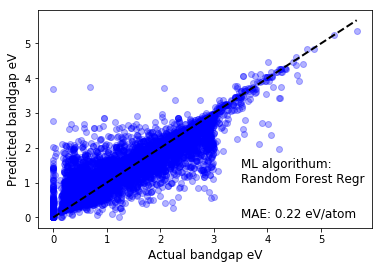

In [48]:
# plot the figure
fontsize = 12
plt.scatter(y_test2, y_pred_test2, marker='o', color = 'blue', alpha = 0.3)
straightline_x = [min(y_test2), max(y_test2)]
straightline_y = [min(y_test2), max(y_test2)]
plt.plot(straightline_x, straightline_y, 'k--', linewidth=2)
plt.xlabel("Actual bandgap eV", fontsize = fontsize)
plt.ylabel("Predicted bandgap eV", fontsize = fontsize)
label1 = "MAE: {} eV/atom".format(round(mean_absolute_error,2))
label2 = "ML algorithum:\n{}".format('Random Forest Regr')
plt.text(3.5, 0, label1, fontsize=fontsize)
plt.text(3.5, 1, label2, fontsize=fontsize)
plt.savefig("./actual vs. predicted bandgap_random_searchCV_randomforest.jpeg",dpi = 400)

In [49]:
print(randomsearch_rf_bandgap.best_estimator_)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
